# Kobe Bryant shot selection 

### 載入套件及data

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import math as m
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # display all columns

In [6]:
df = pd.read_csv('data.csv', encoding='BIG5')
not_applicable = df['shot_made_flag'].isnull()

df = df[~not_applicable]

In [7]:
df.head() #顯示資料

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [8]:
df.info() #查看檔案資訊，有哪些columns、大小和資料類型等等

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25697 entries, 1 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   game_event_id       25697 non-null  int64  
 3   game_id             25697 non-null  int64  
 4   lat                 25697 non-null  float64
 5   loc_x               25697 non-null  int64  
 6   loc_y               25697 non-null  int64  
 7   lon                 25697 non-null  float64
 8   minutes_remaining   25697 non-null  int64  
 9   period              25697 non-null  int64  
 10  playoffs            25697 non-null  int64  
 11  season              25697 non-null  object 
 12  seconds_remaining   25697 non-null  int64  
 13  shot_distance       25697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           25697 non-null  object 
 16  shot

In [62]:
import pandas as pd
Parameters = pd.read_csv("Parameters.csv")
Parameters = np.array(Parameters)
pandasData={"Parameters":Parameters[:,0],"ParametersChinese":Parameters[:,1]}
DataParameters = pd.DataFrame(pandasData)
print(DataParameters)

             Parameters ParametersChinese
0   combined_shot_type               進攻方式
1        game_event_id              這個不清楚
2              game_id               比賽ID
3                  lat                投籃點
4                loc_x                投籃點
5                loc_y                投籃點
6                  lon                投籃點
7    minutes_remaining         單節剩餘時間（分鐘）
8               period              表示第幾節
9             playoffs             是否是季後賽
10              season                 賽季
11   seconds_remaining            剩餘時間（秒）
12       shot_distance               投籃距離
13      shot_made_flag               是否進球
14           shot_type            兩分球或三分球
15      shot_zone_area               投籃區域
16     shot_zone_basic          投籃區域（更具體）
17     shot_zone_range               投籃範圍
18             team_id               球隊ID
19           team_name               球隊名稱
20           game_date               比賽日期
21             matchup               比賽雙方
22            opponent            

In [9]:
df.describe() #查看一些基本的統計詳細資訊

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [10]:
df.describe(include=['object', 'category'])

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697,25697
unique,55,6,20,2,6,7,5,1,1558,74,33
top,Jump Shot,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,15836,19710,1924,20285,11289,10532,7857,25697,43,853,1638


## Kobe 的投籃命中與否

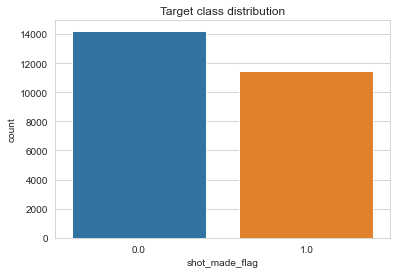

In [11]:
ax = plt.axes()
sns.countplot(x='shot_made_flag', data=df, ax=ax);
ax.set_title('Target class distribution')
plt.show()

## Kobe的單節出手狀況

<AxesSubplot:xlabel='period', ylabel='count'>

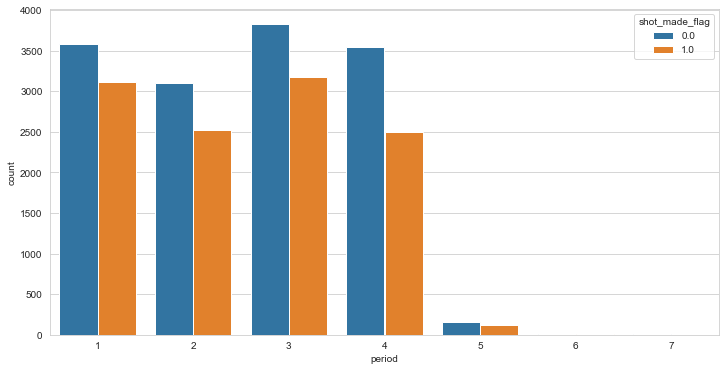

In [12]:
#Number of shots taken in each period
plt.figure(figsize =(12,6))
sns.countplot(x = 'period',hue = "shot_made_flag",data = df)

## Kobe 不同出手方式的投籃命中率

<AxesSubplot:ylabel='combined_shot_type'>

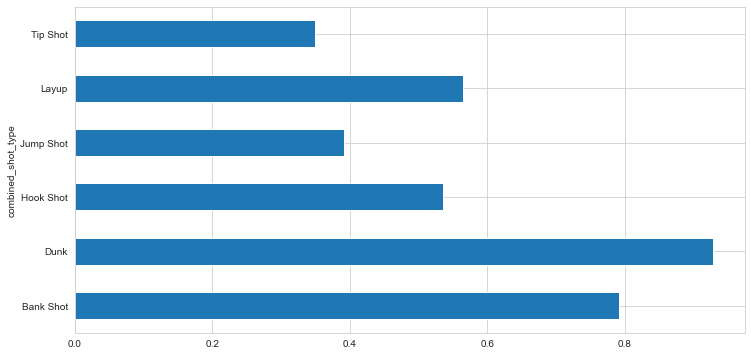

In [13]:
#Accuracy
shot_type_acc = df['shot_made_flag'].groupby(df['combined_shot_type']).mean()
shot_type_acc.plot(kind='barh', figsize=(12, 6))

## Kobe 的一些綜合資料

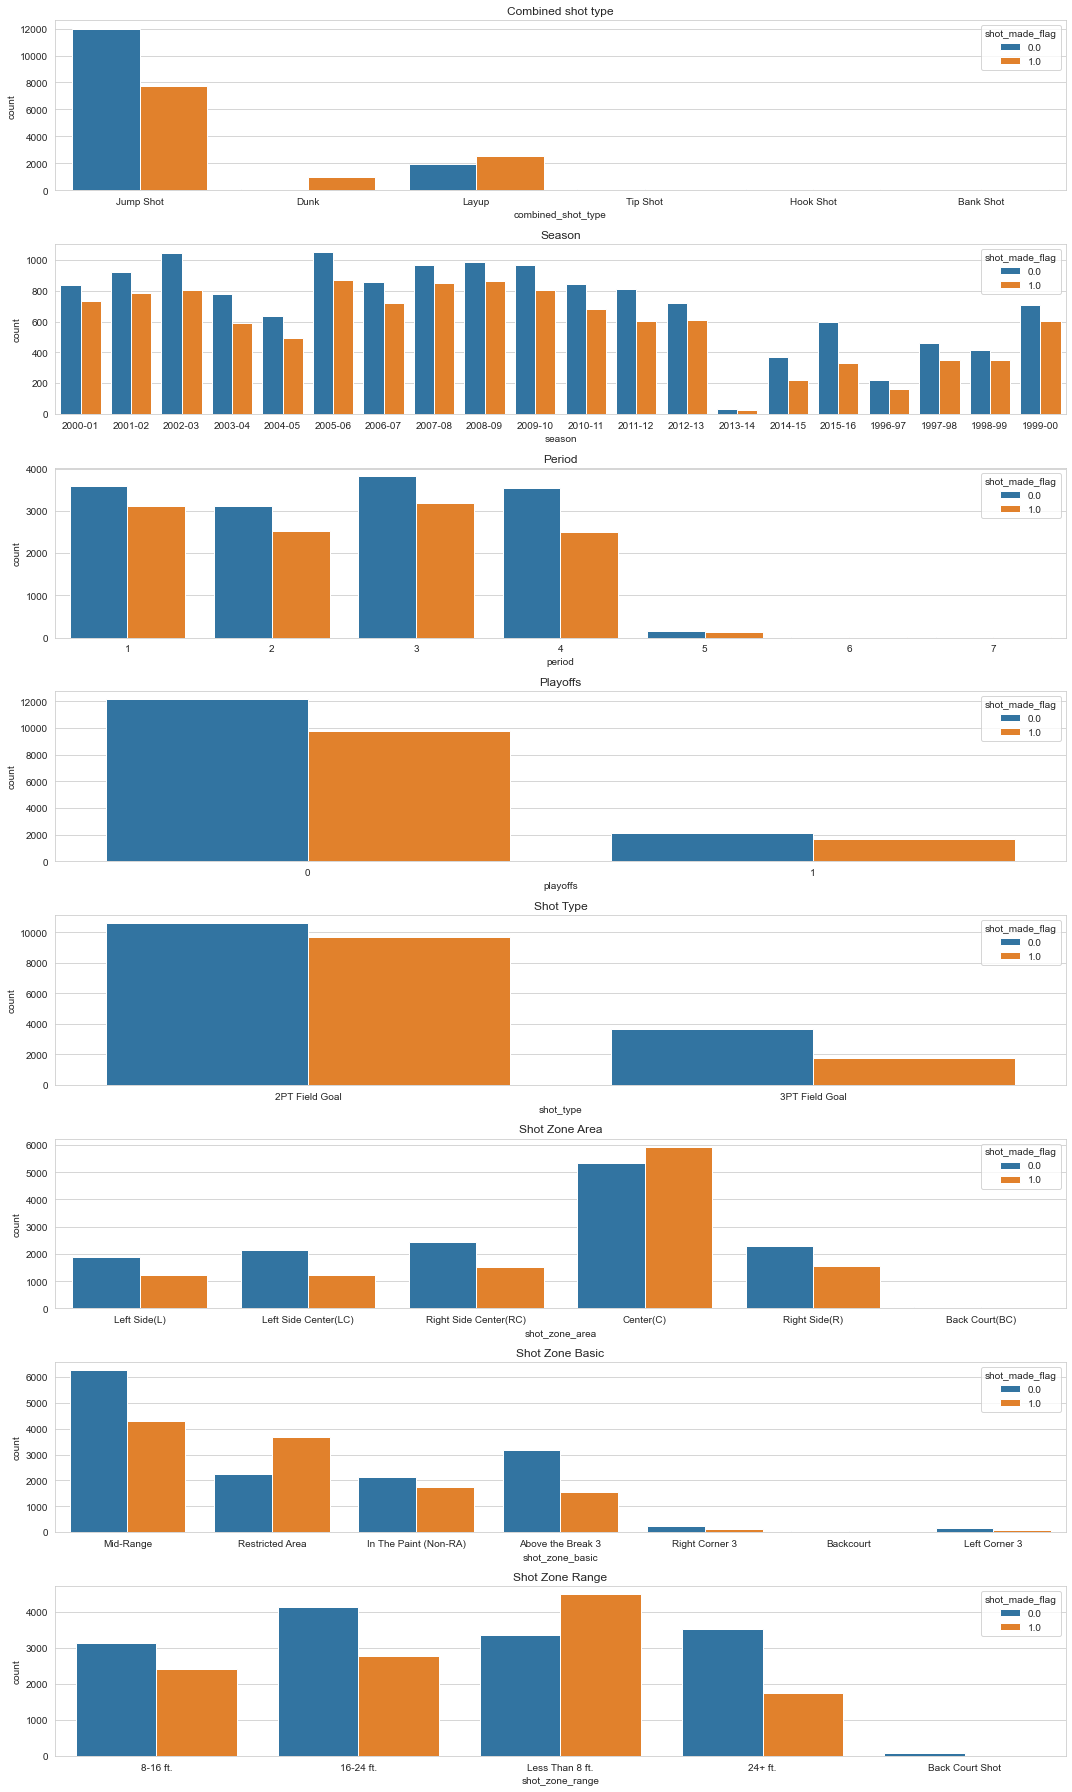

In [14]:
f, axarr = plt.subplots(8, figsize=(15, 25))

sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=df, ax=axarr[0])
sns.countplot(x="season", hue="shot_made_flag", data=df, ax=axarr[1])
sns.countplot(x="period", hue="shot_made_flag", data=df, ax=axarr[2])
sns.countplot(x="playoffs", hue="shot_made_flag", data=df, ax=axarr[3])
sns.countplot(x="shot_type", hue="shot_made_flag", data=df, ax=axarr[4])
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=df, ax=axarr[5])
sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=df, ax=axarr[6])
sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=df, ax=axarr[7])

axarr[0].set_title('Combined shot type')
axarr[1].set_title('Season')
axarr[2].set_title('Period')
axarr[3].set_title('Playoffs')
axarr[4].set_title('Shot Type')
axarr[5].set_title('Shot Zone Area')
axarr[6].set_title('Shot Zone Basic')
axarr[7].set_title('Shot Zone Range')

plt.tight_layout()
plt.show()

## Kobe的命中位置圖

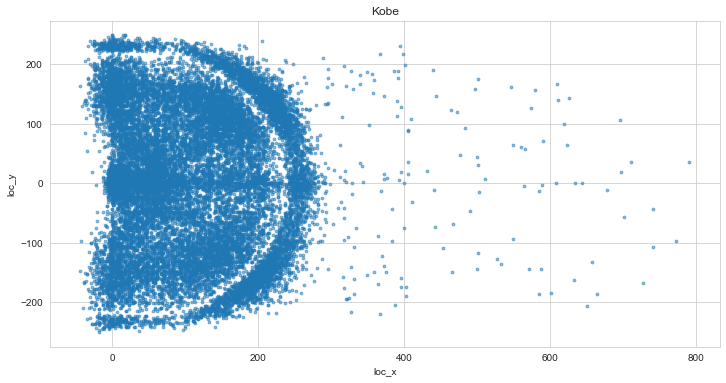

In [15]:
plt.figure(figsize=(12,6))
plt.xlabel('loc_x')
plt.ylabel('loc_y')
plt.title('Kobe')
plt.scatter(df.loc_y,df.loc_x,s=8,alpha=.5)

## Kobe 的對手分析

<AxesSubplot:xlabel='count', ylabel='opponent'>

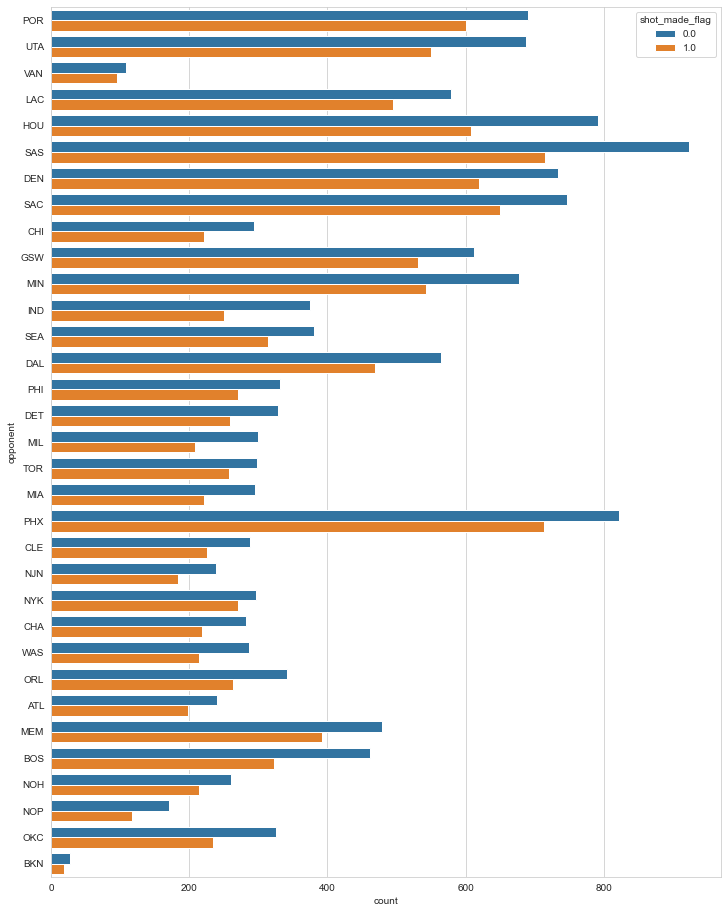

In [16]:
plt.figure(figsize=(12,16))
sns.countplot(y="opponent", hue="shot_made_flag", data=df)

### Data及特徵整理

In [17]:
df["game_year"] = df["game_date"].str[0:4].astype(int)
df["game_month"] = df["game_date"].str[5:7].astype(int)

In [18]:
df['action_first_words'] = df["action_type"].str.split(' ').str[0]

In [19]:
df['season_start_year'] = df.season.str.split('-').str[0].astype(int)

In [20]:
df["remaining"] = df["minutes_remaining"] * 60 + df["seconds_remaining"]

In [21]:
df['away'] = df.matchup.str.contains('@')

In [22]:
df['distance_bin'] = pd.cut(df.shot_distance, bins=10, labels=range(10))

In [23]:
df['angle'] = df.apply(lambda row: 90 if row['loc_y']==0 else m.degrees(m.atan(row['loc_x']/abs(row['loc_y']))),axis=1)
df['angle_bin'] = pd.cut(df.angle, 7, labels=range(7))
df['angle_bin'] = df.angle_bin.astype(int)

### 選取訓練、測試集，並作第一次Features選取

In [24]:
train = df.copy()
test = pd.DataFrame(df[['shot_made_flag', 'shot_id']].copy())

In [25]:
selected_features = ['action_first_words', 'combined_shot_type', 'remaining', 'period', 'season_start_year'
    , 'shot_type', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'away', 'distance_bin', 'angle_bin', 'shot_id']

In [26]:
train = train[selected_features]
print(train)
train = pd.get_dummies(train)
print(train)

      action_first_words combined_shot_type  remaining  period  \
1                   Jump          Jump Shot        622       1   
2                   Jump          Jump Shot        465       1   
3                   Jump          Jump Shot        412       1   
4                Driving               Dunk        379       2   
5                   Jump          Jump Shot        572       3   
...                  ...                ...        ...     ...   
30691            Driving              Layup        424       4   
30692               Jump          Jump Shot        365       4   
30694            Running          Jump Shot        208       4   
30695               Jump          Jump Shot        130       4   
30696               Jump          Jump Shot         39       4   

       season_start_year       shot_type        shot_zone_basic  \
1                   2000  2PT Field Goal              Mid-Range   
2                   2000  2PT Field Goal              Mid-Range   
3     

In [27]:
# 設定訓練集、切割測試集
testid = [30085, 26369, 27841, 15946, 22900]

X_train = train[(train.shot_id != testid[0]) & (train.shot_id != testid[1]) & (train.shot_id != testid[2]) & (train.shot_id != testid[3]) & (train.shot_id != testid[4])]
Y_train = test[(test.shot_id != testid[0]) & (test.shot_id != testid[1]) & (test.shot_id != testid[2]) & (test.shot_id != testid[3]) & (test.shot_id != testid[4])].drop('shot_id', axis = 1)

X_test_1 = train[train.shot_id == testid[0]]
X_test_2 = train[train.shot_id == testid[1]]
X_test_3 = train[train.shot_id == testid[2]]
X_test_4 = train[train.shot_id == testid[3]]
X_test_5 = train[train.shot_id == testid[4]]

### 用random forest再進行第二次features選取

In [28]:
rfc = RandomForestClassifier() #隨機森林分類(RandomForestClassifier)

In [29]:
rfc.fit(X_train, Y_train)

<ipython-input-29-96e8a0ce9cd3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier()

In [30]:
features_good_fit = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=["good_fit"])
top50features = features_good_fit.sort_values("good_fit", ascending=False).head(50).index

In [31]:
top50features

Index(['remaining', 'shot_id', 'angle_bin', 'game_year', 'season_start_year',
       'game_month', 'period', 'action_first_words_Jump', 'away',
       'action_first_words_Driving', 'combined_shot_type_Dunk',
       'action_first_words_Layup', 'action_first_words_Running',
       'opponent_HOU', 'opponent_PHX', 'opponent_SAS', 'opponent_DEN',
       'opponent_SAC', 'opponent_GSW', 'opponent_MIN', 'opponent_POR',
       'opponent_UTA', 'opponent_LAC', 'opponent_DAL',
       'shot_zone_basic_Restricted Area', 'combined_shot_type_Jump Shot',
       'opponent_MEM', 'opponent_BOS', 'opponent_TOR', 'opponent_ORL',
       'opponent_NYK', 'opponent_SEA', 'action_first_words_Turnaround',
       'opponent_MIA', 'opponent_CLE', 'opponent_IND', 'opponent_DET',
       'opponent_MIL', 'opponent_PHI', 'combined_shot_type_Layup',
       'opponent_CHA', 'opponent_CHI', 'opponent_WAS',
       'shot_zone_basic_In The Paint (Non-RA)', 'action_first_words_Pullup',
       'opponent_NJN', 'shot_zone_range_Les

In [32]:
X_train = X_train[top50features]

X_test_1 = X_test_1[top50features]
X_test_2 = X_test_2[top50features]
X_test_3 = X_test_3[top50features]
X_test_4 = X_test_4[top50features]
X_test_5 = X_test_5[top50features]

### 用線性回歸作預測

In [33]:
regressor = LinearRegression()

regressor.fit(X_train,Y_train)

LinearRegression()

In [34]:
scores = model_selection.cross_val_score(regressor, X_train, Y_train, cv=10)
print ("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() / 2))    

Accuracy: 0.123 (+/- 0.007)


### 開始test

#### 1997年季後賽Game5 @UTAH，延長賽剩7秒，落後3分的湖人隊是否能靠投進追平呢？

In [35]:
from IPython.display import display
from IPython.display import Image
display(Image(url='https://i.imgur.com/K6PQviM.gif'))

In [36]:
np.round(regressor.predict(X_test_1))

array([[0.]])

* 預測結果Kobe這球不會進

In [37]:
display(Image(url='https://i.imgur.com/YoOHeO2.gif'))

* 結果真的沒進，還airball，哈哈哈(1/1)

#### 2001季後賽Game1 @SAS，第三節剩57秒，Kobe使出了dream shake，是否會進球呢？

In [38]:
display(Image(url='https://i.imgur.com/q7mcHZr.gif'))

In [39]:
np.round(regressor.predict(X_test_2))

array([[1.]])

* 預測結果老大帥氣得分

In [40]:
display(Image(url='https://i.imgur.com/whyUbuw.gif'))

* 老大果然沒讓球迷失望，帥氣入網，真的帥(2/2)

####  2006季後賽Game4 v.s. PHX，延長賽最後出手，是否一雪前恥呢？

In [41]:
display(Image(url='https://i.imgur.com/9c2SVXX.gif'))

In [42]:
np.round(regressor.predict(X_test_3))

array([[0.]])

* 保守預測這球不進

In [43]:
display(Image(url='https://i.imgur.com/TVEdivF.gif'))

* 結果這球決殺了太陽隊，贏得勝利，更贏得球迷的芳心<3，但預測錯誤了QQ(2/3)

#### 2010例行賽@BOS，湖人又落後一分，老大是否能擊敗宿敵呢？

In [44]:
display(Image(url='https://i.imgur.com/AiayiFK.gif'))

In [45]:
np.round(regressor.predict(X_test_4))

array([[1.]])

* 經過上一題的愚昧，預測結果就不再小看老大

In [46]:
display(Image(url='https://i.imgur.com/H346e7f.gif'))

* 老大果然射進啦！守多緊都沒用啦！(3/4)

#### 2016例行賽v.s. UTAH，老大已攻下53分，能否再利用這球刷到56分並將差距縮小至一分？

In [47]:
display(Image(url='https://i.imgur.com/Cji3dAY.gif'))

In [48]:
np.round(regressor.predict(X_test_5))

array([[1.]])

* #相信老大

In [49]:
display(Image(url='https://i.imgur.com/6tLAylj.gif'))

* 啊啊啊進去啦～眼眶微濕，你怎能不愛Kobe？(4/5)